In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
car = pd.read_csv("/content/used_car_price_dataset_extended.csv")

In [4]:
car

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,NaN,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,NaN,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1996,15.25,1500,Petrol,2,5498.71,Hyundai,Manual,Silver,NaN,0,Yes
9996,1997,14.45,5000,Diesel,1,9588.31,Honda,Manual,Gray,Full,0,Yes
9997,2002,19.41,1000,Diesel,4,4557.10,Kia,Manual,Black,Full,0,Yes
9998,2005,12.95,4000,Petrol,5,7413.59,BMW,Automatic,Blue,Full,0,Yes


In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make_year           10000 non-null  int64  
 1   mileage_kmpl        10000 non-null  float64
 2   engine_cc           10000 non-null  int64  
 3   fuel_type           10000 non-null  object 
 4   owner_count         10000 non-null  int64  
 5   price_usd           10000 non-null  float64
 6   brand               10000 non-null  object 
 7   transmission        10000 non-null  object 
 8   color               10000 non-null  object 
 9   service_history     7962 non-null   object 
 10  accidents_reported  10000 non-null  int64  
 11  insurance_valid     10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB


In [6]:
car.describe()

,make_year,mileage_kmpl,engine_cc,owner_count,price_usd,accidents_reported
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2009.206900,17.960753,2287.130000,3.003500,7179.754532,0.492200
std,8.373858,5.025486,1291.276927,1.418904,2795.270940,0.694109
min,1995.000000,5.000000,800.000000,1.000000,1000.000000,0.000000
25%,2002.000000,14.540000,1200.000000,2.000000,5176.547500,0.000000
50%,2009.000000,17.970000,1800.000000,3.000000,6961.260000,0.000000
75%,2016.000000,21.352500,3000.000000,4.000000,8993.732500,1.000000
max,2023.000000,35.000000,5000.000000,5.000000,17647.630000,5.000000


In [7]:
car.isnull().sum()

,0
make_year,0
mileage_kmpl,0
engine_cc,0
fuel_type,0
owner_count,0
price_usd,0
brand,0
transmission,0
color,0
service_history,2038


In [8]:
car.shape

(10000, 12)

In [9]:
car.duplicated().sum()

np.int64(0)

In [10]:
car.value_counts()

make_year  mileage_kmpl  engine_cc  fuel_type  owner_count  price_usd  brand       transmission  color   service_history  accidents_reported  insurance_valid
2023       31.93         4000       Petrol     3            12407.25   Chevrolet   Automatic     Blue    Full             0                   Yes                1
1995       5.00          1000       Diesel     5            1000.00    Honda       Automatic     White   Partial          0                   Yes                1
                         1800       Petrol     2            4422.47    Volkswagen  Manual        Gray    Full             0                   No                 1
           5.18          5000       Petrol     3            6947.85    Kia         Manual        Black   Partial          0                   Yes                1
           5.51          5000       Electric   3            9260.29    Volkswagen  Manual        Silver  Full             0                   Yes                1
                                                                                                                                                                ..
           9.15          3000       Diesel     5            4040.06    Tesla       Manual        Black   Full             0                   Yes                1
           8.98          1000       Diesel     5            1009.34    Kia         Manual        Silver  Full             0                   No                 1
           8.93          800        Electric   2            4926.07    Honda       Automatic     Silver  Full             1                   Yes                1
           8.29          1500       Diesel     2            2343.14    Volkswagen  Manual        Black   Partial          0                   Yes                1
                         1000       Petrol     3            1740.16    Honda       Manual        Gray    Partial          0                   Yes                1
Name: count, Length: 7962, dtype: int64

In [11]:
car["service_history"].value_counts()

,count
service_history,
Full,4987
Partial,2975


In [12]:
car["service_history"].mode()[0]

'Full'

In [13]:
car['service_history'].fillna(car["service_history"].mode()[0],inplace=True)

In [14]:
car["service_history"].value_counts()

,count
service_history,
Full,7025
Partial,2975


In [15]:
car.isnull().sum()

,0
make_year,0
mileage_kmpl,0
engine_cc,0
fuel_type,0
owner_count,0
price_usd,0
brand,0
transmission,0
color,0
service_history,0


In [16]:
car.describe()

,make_year,mileage_kmpl,engine_cc,owner_count,price_usd,accidents_reported
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2009.206900,17.960753,2287.130000,3.003500,7179.754532,0.492200
std,8.373858,5.025486,1291.276927,1.418904,2795.270940,0.694109
min,1995.000000,5.000000,800.000000,1.000000,1000.000000,0.000000
25%,2002.000000,14.540000,1200.000000,2.000000,5176.547500,0.000000
50%,2009.000000,17.970000,1800.000000,3.000000,6961.260000,0.000000
75%,2016.000000,21.352500,3000.000000,4.000000,8993.732500,1.000000
max,2023.000000,35.000000,5000.000000,5.000000,17647.630000,5.000000


In [17]:
car

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,Full,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,Full,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1996,15.25,1500,Petrol,2,5498.71,Hyundai,Manual,Silver,Full,0,Yes
9996,1997,14.45,5000,Diesel,1,9588.31,Honda,Manual,Gray,Full,0,Yes
9997,2002,19.41,1000,Diesel,4,4557.10,Kia,Manual,Black,Full,0,Yes
9998,2005,12.95,4000,Petrol,5,7413.59,BMW,Automatic,Blue,Full,0,Yes


<Axes: >

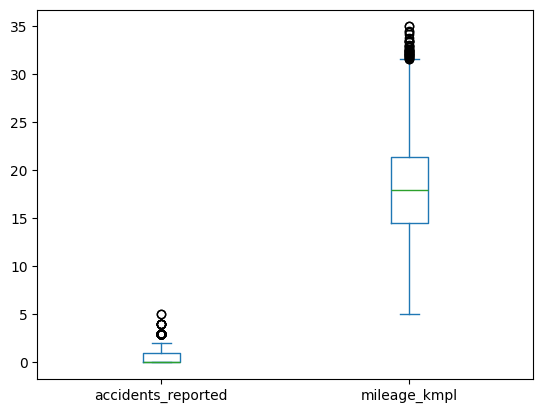

In [18]:
car[['accidents_reported','mileage_kmpl']].plot(kind='box')

<Axes: >

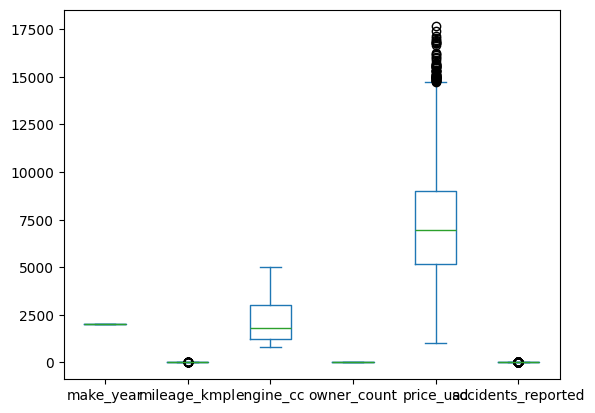

In [19]:
car.plot(kind='box')

In [20]:
outliers = ['accidents_reported','mileage_kmpl','price_usd']

In [21]:
for i in outliers:
  q1 = car[i].describe()['25%']
  q3 = car[i].describe()['75%']
  IQR = q3-q1
  upper_limit = q3+1.5*IQR
  lower_limit = q1-1.5*IQR
  car[i] = car[i].clip(lower_limit,upper_limit)

<Axes: >

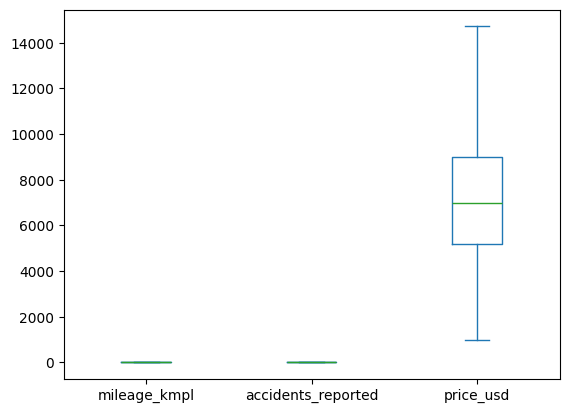

In [22]:
car[['mileage_kmpl','accidents_reported','price_usd']].plot(kind='box')

In [23]:
# nominal cols --- fuel_type,brand,color,insurance_valid
# ordinal cols ---service history

In [24]:
car['fuel_type'].value_counts()

,count
fuel_type,
Petrol,4968
Diesel,4058
Electric,974


In [25]:
car['brand'].value_counts()

,count
brand,
Nissan,1089
Volkswagen,1033
BMW,1021
Tesla,1006
Honda,1003
Chevrolet,999
Hyundai,989
Toyota,956
Kia,955


In [26]:
car = pd.get_dummies(car,columns=['fuel_type','brand','color','transmission','insurance_valid'],dtype=int,drop_first=True)

In [27]:
car

,make_year,mileage_kmpl,engine_cc,owner_count,price_usd,service_history,accidents_reported,fuel_type_Electric,fuel_type_Petrol,brand_Chevrolet,...,brand_Tesla,brand_Toyota,brand_Volkswagen,color_Blue,color_Gray,color_Red,color_Silver,color_White,transmission_Manual,insurance_valid_Yes
0,2001,8.17,4000,4,8587.64,Full,0.0,0,1,1,...,0,0,0,0,0,0,0,1,1,0
1,2014,17.59,1500,4,5943.50,Full,0.0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
2,2023,18.09,2500,5,9273.58,Full,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2009,11.28,800,1,6836.24,Full,0.0,0,1,0,...,0,0,0,1,0,0,0,0,1,1
4,2005,12.23,1000,2,4625.79,Full,0.0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1996,15.25,1500,2,5498.71,Full,0.0,0,1,0,...,0,0,0,0,0,0,1,0,1,1
9996,1997,14.45,5000,1,9588.31,Full,0.0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
9997,2002,19.41,1000,4,4557.10,Full,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
9998,2005,12.95,4000,5,7413.59,Full,0.0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [28]:
car.head()

,make_year,mileage_kmpl,engine_cc,owner_count,price_usd,service_history,accidents_reported,fuel_type_Electric,fuel_type_Petrol,brand_Chevrolet,...,brand_Tesla,brand_Toyota,brand_Volkswagen,color_Blue,color_Gray,color_Red,color_Silver,color_White,transmission_Manual,insurance_valid_Yes
0,2001,8.17,4000,4,8587.64,Full,0.0,0,1,1,...,0,0,0,0,0,0,0,1,1,0
1,2014,17.59,1500,4,5943.50,Full,0.0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
2,2023,18.09,2500,5,9273.58,Full,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2009,11.28,800,1,6836.24,Full,0.0,0,1,0,...,0,0,0,1,0,0,0,0,1,1
4,2005,12.23,1000,2,4625.79,Full,0.0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [29]:
car['service_history'].value_counts()

,count
service_history,
Full,7025
Partial,2975


In [30]:
d = {"Full":1,"Partial":0}

In [31]:
car['service_history'] = car['service_history'].map(d)

In [32]:
car

,make_year,mileage_kmpl,engine_cc,owner_count,price_usd,service_history,accidents_reported,fuel_type_Electric,fuel_type_Petrol,brand_Chevrolet,...,brand_Tesla,brand_Toyota,brand_Volkswagen,color_Blue,color_Gray,color_Red,color_Silver,color_White,transmission_Manual,insurance_valid_Yes
0,2001,8.17,4000,4,8587.64,1,0.0,0,1,1,...,0,0,0,0,0,0,0,1,1,0
1,2014,17.59,1500,4,5943.50,1,0.0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
2,2023,18.09,2500,5,9273.58,1,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2009,11.28,800,1,6836.24,1,0.0,0,1,0,...,0,0,0,1,0,0,0,0,1,1
4,2005,12.23,1000,2,4625.79,1,0.0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1996,15.25,1500,2,5498.71,1,0.0,0,1,0,...,0,0,0,0,0,0,1,0,1,1
9996,1997,14.45,5000,1,9588.31,1,0.0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
9997,2002,19.41,1000,4,4557.10,1,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
9998,2005,12.95,4000,5,7413.59,1,0.0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [68]:
car.columns

Index(['make_year', 'mileage_kmpl', 'engine_cc', 'owner_count', 'price_usd',
       'service_history', 'accidents_reported', 'fuel_type_Electric',
       'fuel_type_Petrol', 'brand_Chevrolet', 'brand_Ford', 'brand_Honda',
       'brand_Hyundai', 'brand_Kia', 'brand_Nissan', 'brand_Tesla',
       'brand_Toyota', 'brand_Volkswagen', 'color_Blue', 'color_Gray',
       'color_Red', 'color_Silver', 'color_White', 'transmission_Manual',
       'insurance_valid_Yes'],
      dtype='object')

In [37]:
car_stad = car.copy()

In [38]:
car_stad.head()

,make_year,mileage_kmpl,engine_cc,owner_count,price_usd,service_history,accidents_reported,fuel_type_Electric,fuel_type_Petrol,brand_Chevrolet,...,brand_Tesla,brand_Toyota,brand_Volkswagen,color_Blue,color_Gray,color_Red,color_Silver,color_White,transmission_Manual,insurance_valid_Yes
0,2001,8.17,4000,4,8587.64,1,0.0,0,1,1,...,0,0,0,0,0,0,0,1,1,0
1,2014,17.59,1500,4,5943.50,1,0.0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
2,2023,18.09,2500,5,9273.58,1,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2009,11.28,800,1,6836.24,1,0.0,0,1,0,...,0,0,0,1,0,0,0,0,1,1
4,2005,12.23,1000,2,4625.79,1,0.0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [39]:
X = car_stad.drop(columns='price_usd',axis=1)

In [40]:
y = car_stad['price_usd'].values.reshape(-1,1)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.02,random_state=0)

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
X_train_scaled

array([[-0.85935157,  0.34172738, -0.60965802, ..., -0.44485679,
         0.81945057,  0.51018434],
       [-1.57659604, -0.81827696, -0.37767487, ..., -0.44485679,
         0.81945057,  0.51018434],
       [ 1.65100405, -2.47656495, -1.15095203, ..., -0.44485679,
         0.81945057,  0.51018434],
       ...,
       [ 0.21651512, -0.59903216, -0.9962966 , ..., -0.44485679,
         0.81945057,  0.51018434],
       [-0.62027009,  0.40750082, -0.9962966 , ..., -0.44485679,
         0.81945057,  0.51018434],
       [-0.14210711, -0.23428852,  0.16361913, ..., -0.44485679,
         0.81945057,  0.51018434]])

In [50]:
X_test_scaled

array([[ 0.6946781 ,  0.19224228,  0.16361913, ..., -0.44485679,
        -1.22032986,  0.51018434],
       [ 1.53146331,  1.32434273, -0.22301944, ..., -0.44485679,
         0.81945057,  0.51018434],
       [ 0.33605587,  1.41602693, -0.84164116, ...,  2.24791441,
         0.81945057,  0.51018434],
       ...,
       [ 1.53146331, -0.44954706, -0.9962966 , ..., -0.44485679,
         0.81945057,  0.51018434],
       [-1.21797381,  0.52708889,  0.55025771, ..., -0.44485679,
         0.81945057,  0.51018434],
       [-0.85935157,  1.07320777,  2.09681201, ..., -0.44485679,
         0.81945057,  0.51018434]])

In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [52]:
y_pred = lr.predict(X_test_scaled)

In [54]:
y_pred.shape

(200, 1)

In [55]:
# evaluation

In [63]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score

In [65]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
r2_score = r2_score(y_test,y_pred)

In [66]:
print(mae)
print(mse)
print(rmse)
print(r2_score)

794.7813033503323
1012543.8062580096
1006.2523571440763
0.862064355347279
